In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt
import scipy
from sympy import *
import pandas as pd

source = "../source"
sys.path.append(source)
import publication
from data import gen_rand_seq

In [2]:
def gen_data(symbols, seq_lens):
    full_data = []
    for seq_len in seq_lens:
        data = gen_rand_seq(seq_len, symbols, len(symbols) ** seq_len)
        data = ["".join(x) for x in data]
        full_data += data
    return full_data

Fraction merged: 0.222


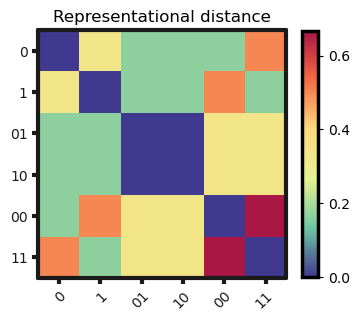

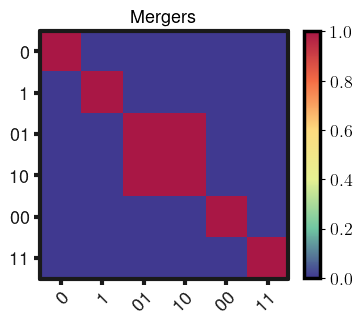

In [3]:
# train_data = ["000", "01", "10", "11", "0"]
train_data = gen_data(["0", "1"], [1, 2])

y = Matrix([[(-1) ** (sum([int(s) for s in x]) & 1)] for x in train_data])

N = Matrix(
    [
        [sum(sum(s_1 == s_2 for s_2 in x_2) for s_1 in x_1) for x_2 in train_data]
        for x_1 in train_data
    ]
)

I = eye(N.shape[0])

U, S = (N + I).diagonalize()
V, Sigma = N.diagonalize()

A = U * (Sigma + I).inv() * Sigma * U.inv()
A = simplify(A)

h = simplify(A * y)
H = scipy.spatial.distance_matrix(h, h)

frac_merged = sum(sum(H == 0)) / (H.shape[0] ** 2)
print(f"Fraction merged: {frac_merged:.3f}")

# plt.figure(figsize=(4, 4))
# publication.set_color_gradient(2)
# plt.imshow(np.array(h).astype(float))
# plt.title("h")
# publication.im_show(y_labels=train_data)

plt.figure(figsize=(4, 4))
publication.set_color_gradient(0)
plt.imshow(H.astype(float))
plt.title("Representational distance")
publication.im_show(x_labels=train_data, y_labels=train_data)

plt.figure(figsize=(4, 4))
publication.set_color_gradient(0)
plt.imshow((H == 0).astype(float))
plt.title("Mergers")
publication.im_show(x_labels=train_data, y_labels=train_data)

In [4]:
clusters = pd.DataFrame(train_data).groupby(np.array(h)[:, 0])
for rep, x in clusters:
    print(f"{rep}: {x.to_numpy()}")
    print("")

-1/3: [['11']]

-1/6: [['1']]

0: [['01']
 ['10']]

1/6: [['0']]

1/3: [['00']]

